<a href="https://colab.research.google.com/github/MINED30/AI-python-connect/blob/master/ds_cs_N423a_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / Assingment 3*

---
# Neural Network Framework (Keras)




## 기본과제
### 케라스 라이브러리를 사용하여 Multi-Layer Perceptron 모델을 CIFAR100 데이터에 적용해보세요.

- 시드를 고정하십시오.
- 데이터를 Noramlized 해줍니다. 
- 케라스에서 모델은 다음과 같이 고정합니다. 
- 활성함수는 ReLU를 사용합니다.
- 단계별로 오늘 배운 규제방법을 적용해봅니다. 


### 문제에 기록된 텍스트를 꼭! 잘 읽어보고 답변을 다셔야 합니다.

In [1]:
##### Base #####

import keras
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.applications import ResNet50

# 데이터 불러오기
np.random.seed(1)
tf.random.set_seed(1)
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
X_train = X_train / 255.
X_test = X_test / 255.

## 1) X_train, y_train의 Data형태를 출력해서 matrix 구조 [N, x, y, c]를 확인하고 입력해보세요.

### 문항 1-1). 데이터의 구조를 출력하기 위한 코드를 입력하세요.

### 문항 1-2). Flatten(input_shape=()) 에 들어갈 데이터 형태를 입력하세요.

In [2]:
##### Your Code Here #####
[X_train.shape,y_train.shape]

[(50000, 32, 32, 3), (50000, 1)]

Base model을 제작합니다.

In [3]:
# Step 1. Basic Model

# 변수 설정을 따로 하는 방법을 적용하기 위한 코드입니다. 
batch_size = 100
epochs_max = 20

# model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3))) ## 문제 1의 데이터구조에서 확인한 내용을 잘 입력하세요
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

# 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results = model.fit(X_train, y_train, epochs=epochs_max, batch_size=batch_size, verbose=1, validation_data=(X_test,y_test))

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 4.3548 - accuracy: 0.0441 - val_loss: 3.8663 - val_accuracy: 0.1067
Epoch 2/20
500/500 [==============================] - 1s 3ms/step - loss: 3.7917 - accuracy: 0.1173 - val_loss: 3.7211 - val_accuracy: 0.1336
Epoch 3/20
500/500 [==============================] - 1s 3ms/step - loss: 3.6517 - accuracy: 0.1408 - val_loss: 3.6870 - val_accuracy: 0.1447
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 3.5702 - accuracy: 0.1534 - val_loss: 3.6012 - val_accuracy: 0.1572
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 3.5057 - accuracy: 0.1701 - val_loss: 3.5252 - val_accuracy: 0.1685
Epoch 6/20
500/500 [==============================] - 1s 3ms/step - loss: 3.4211 - accuracy: 0.1817 - val_loss: 3.5043 - val_accuracy: 0.1731
Epoch 7/20
500/500 [==============================] - 1s 3ms/step - loss: 3.4013 - accuracy: 0.1871 - val_loss: 3.4831 - val_accuracy: 0.1788
Epoch 

In [14]:
model.predict(X_test[0:1])
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 3.3342 - accuracy: 0.2108


## 2) 최종 모델에서 model.evaluate을 통해서 결과를 출력해보세요.  
### 문항 2-1). verbose=0 으로 입력해서 출력되는 accuracy를 입력하세요.
### 문항 2-2). verbose=1 으로 입력해서 출력되는 accuracy를 입력하세요. <Br>
(차이점을 아시겠나요? 차이점을 모른다면 검색해보세요. 정답에 공백을 입력할 수 있어야 합니다.)



In [4]:
# Step 2. Basic Model + Weight Decay

# 변수 설정을 따로 하는 방법을 적용하기 위한 코드입니다. 
batch_size = 100
epochs_max = 20

# model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(128, activation='relu', 
                kernel_regularizer=regularizers.l2(0.00001),    # L2 norm regularization
                activity_regularizer=regularizers.l1(0.00001) )) # L1 norm regularization
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

# 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results = model.fit(X_train, y_train, epochs=epochs_max, batch_size=batch_size, verbose=0, validation_data=(X_test,y_test))

In [5]:
model.evaluate(X_test,  y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 3.3926 - accuracy: 0.2000


[3.392564058303833, 0.20000000298023224]

In [6]:
model.evaluate(X_test,  y_test, verbose=0)

[3.392564058303833, 0.20000000298023224]

## 3) Dropout을 사용하기 위해서는 라이브러리 추가로 불어와야 합니다. 

### 문항 3) Dropout의 라이브러리를 호출하기 위해서 사용한 import 문구를 적어주세요.

In [7]:
# Step 3. Basic Model + Dropout

from tensorflow.keras.layers import Dropout

# 변수 설정을 따로 하는 방법을 적용하기 위한 코드입니다. 
batch_size = 100
epochs_max = 20

# model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(128*1.1, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

# 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results = model.fit(X_train, y_train, epochs=epochs_max, batch_size=batch_size, verbose=1, validation_data=(X_test,y_test))

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 4.4480 - accuracy: 0.0311 - val_loss: 3.9934 - val_accuracy: 0.0775
Epoch 2/20
500/500 [==============================] - 1s 3ms/step - loss: 4.0173 - accuracy: 0.0779 - val_loss: 3.8617 - val_accuracy: 0.1121
Epoch 3/20
500/500 [==============================] - 1s 3ms/step - loss: 3.9137 - accuracy: 0.0949 - val_loss: 3.7819 - val_accuracy: 0.1267
Epoch 4/20
500/500 [==============================] - 1s 3ms/step - loss: 3.8587 - accuracy: 0.1047 - val_loss: 3.7475 - val_accuracy: 0.1231
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 3.8170 - accuracy: 0.1130 - val_loss: 3.6885 - val_accuracy: 0.1361
Epoch 6/20
500/500 [==============================] - 1s 3ms/step - loss: 3.7615 - accuracy: 0.1225 - val_loss: 3.6834 - val_accuracy: 0.1377
Epoch 7/20
500/500 [==============================] - 1s 3ms/step - loss: 3.7366 - accuracy: 0.1243 - val_loss: 3.6403 - val_accuracy: 0.1445
Epoch 

### 문항 4) Early Stopping을 사용할 수 있도록 강의자료에서 코드를 잘 발췌해서 사용하시고, 50개의 Epoch를 돌렸을 때 Stop된 epoch 숫자를 입력하세요

In [9]:
# Step 4. Basic Model + Early Stopping

# 학습시킨 데이터를 저장시키기 위한 코드입니다. 
checkpoint_filepath = "FMbest.hdf5"

model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

# 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)
# Validation Set을 기준으로 가장 최적의 모델을 찾기
save_best = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch', options=None)

model.fit(X_train, y_train, batch_size=batch_size, epochs=50, verbose=1, 
          validation_data=(X_test,y_test), 
          callbacks=[early_stop, save_best])

Epoch 1/50
500/500 [==============================] - 2s 3ms/step - loss: 4.3196 - accuracy: 0.0454 - val_loss: 3.8364 - val_accuracy: 0.1100

Epoch 00001: val_loss improved from inf to 3.83637, saving model to FMbest.hdf5
Epoch 2/50
500/500 [==============================] - 1s 3ms/step - loss: 3.7895 - accuracy: 0.1169 - val_loss: 3.7194 - val_accuracy: 0.1331

Epoch 00002: val_loss improved from 3.83637 to 3.71943, saving model to FMbest.hdf5
Epoch 3/50
500/500 [==============================] - 1s 3ms/step - loss: 3.6419 - accuracy: 0.1452 - val_loss: 3.6360 - val_accuracy: 0.1481

Epoch 00003: val_loss improved from 3.71943 to 3.63604, saving model to FMbest.hdf5
Epoch 4/50
500/500 [==============================] - 1s 3ms/step - loss: 3.5510 - accuracy: 0.1589 - val_loss: 3.5606 - val_accuracy: 0.1633

Epoch 00004: val_loss improved from 3.63604 to 3.56062, saving model to FMbest.hdf5
Epoch 5/50
500/500 [==============================] - 1s 2ms/step - loss: 3.4674 - accuracy: 0.1

In [10]:
# 학습된 모델을 이용하여 테스트하는 코드

model.predict(X_test[0:1])
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 3.3186 - accuracy: 0.2196


In [11]:
model.load_weights(checkpoint_filepath)
# best model을 이용한 테스트 데이터 예측 정확도 재확인 코드

model.predict(X_test[0:1])
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 3.3041 - accuracy: 0.2179


## 도전과제

- 하이퍼 파라미터 튜닝을 사용하여 모델의 정확도를 최대한 높여보세요.
- 교차 검증(CV) 기법을 사용하여 모델과 조금 더 일관된 결과를 얻어보세요.
- 아직 이론을 배우진 않았지만, Cifar100의 분류문제를 효율적으로 찾기위한 방법을 찾아보세요. 
- 대부분의 문제풀이는 CNN을 통해서 해결했을 것입니다. 
- 이제 코드를 보는 방법이 조금씩 익숙해졌기 때문에 다른 사람들이 돌려놓은 파일을 이해해서 돌아가는 샘플코드를 만들어볼 수 있을 것입니다. 
- 남들이 작성해두었고, 돌아가는 코드를 찾아서 변환하는 것이기 때문에 CNN이라고 해서 어려울 것은 없습니다. 
- 아직 원리를 모르지만, cifar100 데이터셋을 이용하여 CNN 모델을 구축하고 기본적인 신경망의 결과와 비교해 보십시오. 
- [참조링크](https://www.kaggle.com/adi160/cifar-10-keras-transfer-learning)


### 신경망

#### 데이터불러오기

In [10]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

batch_size = 128
num_classes = 100
epochs = 50

# 데이터 불러오기
np.random.seed(1)
tf.random.set_seed(1)
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train = X_train / 255.0 
X_test = X_test / 255.0 

# X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=.2)

In [40]:
[X_train.shape, y_train.shape]

[(40000, 32, 32, 3), (40000, 100)]

#### 모델제작

In [11]:
# transfer
from keras.applications import VGG19, ResNet50
from tensorflow.keras.optimizers import Adam, SGD

base_model_1 = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3), classes=y_train.shape[1])

model_1= Sequential()
model_1.add(base_model_1) 
model_1.add(Flatten()) 

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
model_1.add(Dropout(.3)) #Adding a dropout layer that will randomly drop /30% of the weights
model_1.add(Dense(128,activation=('relu')))
model_1.add(Dropout(.2))
model_1.add(Dense(num_classes,activation=('softmax'))) #This is the classification layer

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

#### 모델 fit

In [13]:
import keras 

learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model_1.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1)

model_1.fit(X_train, y_train, batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    epochs=epochs, verbose=1)

Epoch 1/50
391/391 [==============================] - 19s 44ms/step - loss: 4.5589 - accuracy: 0.0205 - val_loss: 3.9165 - val_accuracy: 0.1342
Epoch 2/50
391/391 [==============================] - 17s 42ms/step - loss: 3.9106 - accuracy: 0.1187 - val_loss: 3.0882 - val_accuracy: 0.2640
Epoch 3/50
391/391 [==============================] - 16s 42ms/step - loss: 3.2640 - accuracy: 0.2192 - val_loss: 2.6320 - val_accuracy: 0.3389
Epoch 4/50
391/391 [==============================] - 17s 42ms/step - loss: 2.8477 - accuracy: 0.2894 - val_loss: 2.3447 - val_accuracy: 0.3976
Epoch 5/50
391/391 [==============================] - 17s 42ms/step - loss: 2.5585 - accuracy: 0.3457 - val_loss: 2.2349 - val_accuracy: 0.4178
Epoch 6/50
391/391 [==============================] - 17s 42ms/step - loss: 2.3293 - accuracy: 0.3928 - val_loss: 2.1042 - val_accuracy: 0.4472
Epoch 7/50
391/391 [==============================] - 16s 42ms/step - loss: 2.1646 - accuracy: 0.4278 - val_loss: 2.0453 - val_accuracy:

#### Visualize history

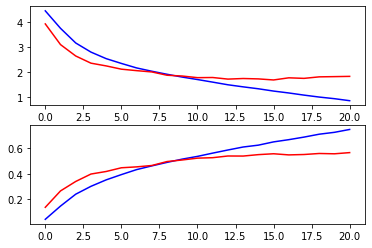

In [14]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assign the first subplot to graph training loss and validation loss
ax[0].plot(model_1.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model_1.history.history['val_loss'],color='r',label='Validation Loss')

#Next lets plot the training accuracy and validation accuracy
ax[1].plot(model_1.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model_1.history.history['val_accuracy'],color='r',label='Validation Accuracy')

#### test

In [59]:
model_1.predict(X_test)
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 1.9139 - accuracy: 0.5470


### CNN


#### 모델제작

In [60]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)             

#### 모델훈련

In [67]:
learn_rate=.001

adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    epochs=epochs, verbose=1)


Epoch 1/50
313/313 [==============================] - 2s 6ms/step - loss: 1.7298 - accuracy: 0.5133 - val_loss: 3.6956 - val_accuracy: 0.3356
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 0.8860 - accuracy: 0.7287 - val_loss: 4.1809 - val_accuracy: 0.3324
Epoch 3/50
313/313 [==============================] - 2s 6ms/step - loss: 0.6527 - accuracy: 0.7899 - val_loss: 4.8308 - val_accuracy: 0.3319
Epoch 4/50
313/313 [==============================] - 2s 6ms/step - loss: 0.5007 - accuracy: 0.8363 - val_loss: 5.2112 - val_accuracy: 0.3290
Epoch 5/50
313/313 [==============================] - 2s 6ms/step - loss: 0.3863 - accuracy: 0.8703 - val_loss: 5.6783 - val_accuracy: 0.3342
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 0.3017 - accuracy: 0.9012 - val_loss: 6.0775 - val_accuracy: 0.3306
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 0.2674 - accuracy: 0.9118 - val_loss: 6.5409 - val_accuracy: 0.3364
Epoch 

#### Visualize history

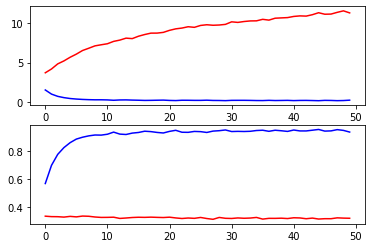

In [70]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assign the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Next lets plot the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

#### test

In [72]:
## ANN
model_1.predict(X_test)
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 1.9139 - accuracy: 0.5470


In [77]:
## CNN
model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 11.0041 - accuracy: 0.3158


#### 중간점검

기본적인 ANN모델은 테스트셋에서 정확도가 0.5470이었는데 CNN모델에서는 0.3158이었다. ANN은 캐글 작성자가 열심히 조정해놓은 것이니까, CNN을 조정해서 ANN보다 좋게 만들어 보자

### CNN

#### 모델링

In [18]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

(X_train, y_train), (X_test, y_test) = cifar100.load_data()
num_classes=100

X_train = X_train / 255.
X_test = X_test / 255.
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Create Model(CNN + Dropout)
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
model.summary()

#### 모델 훈련

In [6]:
# Training
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

checkpoint_filepath = "cifar.hdf5"
save_best = ModelCheckpoint(
    filepath=checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch', options=None)

history = model.fit(X_train, y_train
                    , batch_size=64
                    , epochs=100
                    , validation_data=(X_test, y_test)
                    , verbose=1
                    , callbacks=[early_stop, save_best])

Epoch 1/100
782/782 [==============================] - 37s 8ms/step - loss: 4.5217 - accuracy: 0.0312 - val_loss: 3.8341 - val_accuracy: 0.0964

Epoch 00001: val_loss improved from inf to 3.83407, saving model to cifar.hdf5
Epoch 2/100
782/782 [==============================] - 6s 8ms/step - loss: 3.8235 - accuracy: 0.1066 - val_loss: 3.2872 - val_accuracy: 0.1948

Epoch 00002: val_loss improved from 3.83407 to 3.28716, saving model to cifar.hdf5
Epoch 3/100
782/782 [==============================] - 6s 8ms/step - loss: 3.3982 - accuracy: 0.1754 - val_loss: 3.2555 - val_accuracy: 0.2048

Epoch 00003: val_loss improved from 3.28716 to 3.25553, saving model to cifar.hdf5
Epoch 4/100
782/782 [==============================] - 6s 8ms/step - loss: 3.0428 - accuracy: 0.2414 - val_loss: 2.6684 - val_accuracy: 0.3184

Epoch 00004: val_loss improved from 3.25553 to 2.66837, saving model to cifar.hdf5
Epoch 5/100
782/782 [==============================] - 6s 8ms/step - loss: 2.7576 - accuracy: 0

#### Visualize history

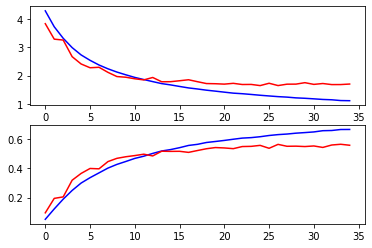

In [7]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assign the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Next lets plot the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

### 중간점검2


#### 비교

In [15]:
## ANN
model_1.predict(X_test)
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 1.8161 - accuracy: 0.5672


In [19]:
## CNN
model.predict(X_test)
model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 1.7015 - accuracy: 0.5565


[1.7014621496200562, 0.5565000176429749]

수많은 변경 끝에 ANN보다 살짝 나은 정도의 성능을 내는 CNN모델을 만들었다. 클래스가 100개인 데이터를 분류하기는 정말 힘들다.

ANN이 저렇게 좋을 수 있는 이유가
VGG19라는 구조때문이다. 빼고 돌려보자

#### without vgg19


In [28]:
## without VGG19
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

batch_size = 128
num_classes = 100
epochs = 50

# 데이터 불러오기
np.random.seed(1)
tf.random.set_seed(1)
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train = X_train / 255.0 
X_test = X_test / 255.0 

# transfer
from keras.applications import VGG19, ResNet50
from tensorflow.keras.optimizers import Adam, SGD


model_1= Sequential()
model_1.add(Flatten(input_shape=(32, 32, 3))) 

model_1.add(Dense(1024,activation=('relu')))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
model_1.add(Dropout(.3)) #Adding a dropout layer that will randomly drop /30% of the weights
model_1.add(Dense(128,activation=('relu')))
model_1.add(Dropout(.2))
model_1.add(Dense(num_classes,activation=('softmax'))) #This is the classification layer

model_1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_33 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)             

In [29]:
import keras 

learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model_1.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1)

model_1.fit(X_train, y_train, batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    epochs=epochs, verbose=1)

Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 4.6063 - accuracy: 0.0140 - val_loss: 4.5274 - val_accuracy: 0.0428
Epoch 2/50
391/391 [==============================] - 1s 4ms/step - loss: 4.5193 - accuracy: 0.0326 - val_loss: 4.3945 - val_accuracy: 0.0497
Epoch 3/50
391/391 [==============================] - 1s 4ms/step - loss: 4.4042 - accuracy: 0.0451 - val_loss: 4.2527 - val_accuracy: 0.0639
Epoch 4/50
391/391 [==============================] - 1s 4ms/step - loss: 4.2920 - accuracy: 0.0524 - val_loss: 4.1427 - val_accuracy: 0.0792
Epoch 5/50
391/391 [==============================] - 1s 4ms/step - loss: 4.2081 - accuracy: 0.0621 - val_loss: 4.0598 - val_accuracy: 0.0945
Epoch 6/50
391/391 [==============================] - 1s 4ms/step - loss: 4.1309 - accuracy: 0.0696 - val_loss: 3.9836 - val_accuracy: 0.1084
Epoch 7/50
391/391 [==============================] - 1s 4ms/step - loss: 4.0717 - accuracy: 0.0778 - val_loss: 3.9291 - val_accuracy: 0.1172
Epoch 

In [30]:
## ANN
model_1.predict(X_test)
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 3.2221 - accuracy: 0.2316


### VGG19

새로만든 CNN의 성능이 문제가 아니었고, VGG19라는 아키텍쳐가 성능이 좋은 것이었다. VGG19구조를 빼고 단순한 인공신경망으로 진행하니 정확도가 반이 떨어졌다. 그렇다면 VGG가 무엇인가? 

VGG19는 이미지에서 성능이 매우 좋은 pre trained 모델 중에 하나이다. 이미 VGG19라는 architecture에는 convolution을 포함하는 여러개의 블록이 있다. 아래는 VGG19를 CNN으로 직접 구현한 코드이다.

#### CNN : VGG19 Architecture

In [35]:
import keras
import numpy as np
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.initializers import he_normal
from keras import optimizers
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.layers.normalization import BatchNormalization
from keras.utils.data_utils import get_file
import matplotlib.pyplot as plt

num_classes = 100
batch_size = 128
epochs = 50
iterations = 391
dropout = 0.5
weight_decay = 0.0001
log_filepath = r'./vgg19_retrain_logs/'


def scheduler(epoch):
    if epoch < 80:
        return 0.1
    if epoch < 160:
        return 0.01
    return 0.001


# data loading
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# data preprocessing
x_train[:, :, :, 0] = (x_train[:, :, :, 0]-123.680)
x_train[:, :, :, 1] = (x_train[:, :, :, 1]-116.779)
x_train[:, :, :, 2] = (x_train[:, :, :, 2]-103.939)
x_test[:, :, :, 0] = (x_test[:, :, :, 0]-123.680)
x_test[:, :, :, 1] = (x_test[:, :, :, 1]-116.779)
x_test[:, :, :, 2] = (x_test[:, :, :, 2]-103.939)

# build model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block1_conv1', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block1_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block2_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block2_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block3_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block3_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block3_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block3_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# Block 4
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block4_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block4_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block4_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block4_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block5_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block5_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block5_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block5_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

# model modification for cifar-10
model.add(Flatten(name='flatten'))
model.add(Dense(4096, use_bias=True, kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal(), name='fc_cifa10'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(4096, kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal(), name='fc2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(100, kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal(), name='predictions_cifa10'))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# load pretrained weight from VGG19 by name
# model.load_weights(filepath, by_name=True)

# optimizer
sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr, tb_cb]

print('Using real-time data augmentation.')
datagen = ImageDataGenerator(horizontal_flip=True,
                             width_shift_range=0.125, height_shift_range=0.125, fill_mode='constant', cval=0.)

datagen.fit(x_train)

Using real-time data augmentation.


In [37]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=iterations,
                              epochs=epochs,
                              callbacks=cbks,
                              validation_data=(x_test, y_test))
model.save('retrain.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
391/391 [==============================] - 32s 81ms/step - loss: 7.3109 - accuracy: 0.0165 - val_loss: 7.1567 - val_accuracy: 0.0102
Epoch 2/50
391/391 [==============================] - 30s 77ms/step - loss: 6.7764 - accuracy: 0.0269 - val_loss: 6.8625 - val_accuracy: 0.0116
Epoch 3/50
391/391 [==============================] - 30s 77ms/step - loss: 6.1555 - accuracy: 0.0499 - val_loss: 6.1232 - val_accuracy: 0.0467
Epoch 4/50
391/391 [==============================] - 30s 77ms/step - loss: 5.6922 - accuracy: 0.0732 - val_loss: 5.7532 - val_accuracy: 0.0666
Epoch 5/50
391/391 [==============================] - 30s 77ms/step - loss: 5.3356 - accuracy: 0.0913 - val_loss: 5.6037 - val_accuracy: 0.0611
Epoch 6/50
391/391 [==============================] - 30s 77ms/step - loss: 4.9273 - accuracy: 0.1186 - val_loss: 5.1712 - val_accuracy: 0.0853
Epoch 7/50
391/391 [==============================] - 30s 77ms/step - loss: 4.6097 - accuracy: 0.1451 - val_loss: 4.7377 - val_accuracy:

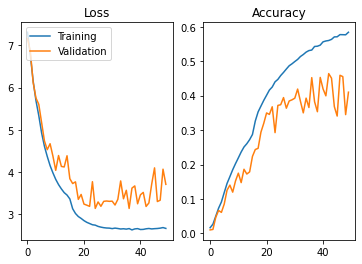

In [41]:
loss = history.history.get('loss')
acc = history.history.get('accuracy')
val_loss = history.history.get('val_loss')
val_acc = history.history.get('val_accuracy')

plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss)), loss, label="Training")
plt.plot(range(len(val_loss)), val_loss, label='Validation')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc)), acc, label='Training')
plt.plot(range(len(val_acc)), val_acc, label='Validation')
plt.title('Accuracy')
plt.show()

#### VGG19 구조파악하기

In [44]:
from keras.applications.vgg19 import VGG19
get_inside = VGG19()
print(get_inside.summary())

574717952/574710816 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

VGG19를 import하면 구조자체를바꾸는 것입니다.

### CV

In [14]:
import keras 
import tensorflow as tf
import numpy as np
from keras.applications import VGG19, ResNet50
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold

## init
batch_size = 128
num_classes = 100
epochs = 50
learn_rate=.001
n_fold=5

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1)

skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)

accuracy=[]

## load data
np.random.seed(1)
tf.random.set_seed(1)
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train = X_train / 255.0 
X_test = X_test / 255.0 


# transfer
for train, val in skf.split(X_train,y_train):
  base_model_1 = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3), classes=y_train.shape[1])

  model_1= Sequential()
  model_1.add(base_model_1) 
  model_1.add(Flatten()) 

  model_1.add(Dense(1024,activation=('relu'),input_dim=512))
  model_1.add(Dense(512,activation=('relu'))) 
  model_1.add(Dense(256,activation=('relu'))) 
  model_1.add(Dropout(.3)) #Adding a dropout layer that will randomly drop /30% of the weights
  model_1.add(Dense(128,activation=('relu')))
  model_1.add(Dropout(.2))
  model_1.add(Dense(num_classes,activation=('softmax'))) #This is the classification layer

  model_1.compile(optimizer=sgd
                  ,loss='sparse_categorical_crossentropy'
                  ,metrics=['accuracy'])


  history = model_1.fit(X_train, y_train
                        , batch_size=batch_size
                        , validation_data=(X_test, y_test)
                        , callbacks=[early_stop]
                        , epochs=epochs
                        , verbose=1)

  accuracy_history = history.history['accuracy']
  val_accuracy_history = history.history['val_accuracy']
  
  k_accuracy = f"{model.evaluate(X_train[val],y_train[val])[1]:.4f}"
  accuracy.append([k_accuracy,accuracy_history,val_accuracy_history])

Epoch 1/50
391/391 [==============================] - 25s 45ms/step - loss: 4.5609 - accuracy: 0.0206 - val_loss: 3.9638 - val_accuracy: 0.1343
Epoch 2/50
391/391 [==============================] - 17s 42ms/step - loss: 3.9222 - accuracy: 0.1168 - val_loss: 3.0913 - val_accuracy: 0.2645
Epoch 3/50
391/391 [==============================] - 16s 42ms/step - loss: 3.2820 - accuracy: 0.2205 - val_loss: 2.6855 - val_accuracy: 0.3293
Epoch 4/50
391/391 [==============================] - 17s 42ms/step - loss: 2.8552 - accuracy: 0.2864 - val_loss: 2.3965 - val_accuracy: 0.3838
Epoch 5/50
391/391 [==============================] - 17s 42ms/step - loss: 2.5707 - accuracy: 0.3422 - val_loss: 2.2818 - val_accuracy: 0.4144
Epoch 6/50
391/391 [==============================] - 17s 42ms/step - loss: 2.3501 - accuracy: 0.3879 - val_loss: 2.1162 - val_accuracy: 0.4428
Epoch 7/50
391/391 [==============================] - 17s 42ms/step - loss: 2.1755 - accuracy: 0.4280 - val_loss: 2.0255 - val_accuracy:

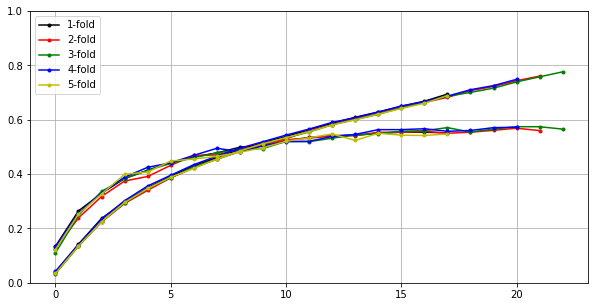

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
colours = 'krgby'
for i in range(5):
  plt.plot(accuracy[i][1],marker='.',c=colours[i],label=str(i+1)+"-fold")
  plt.plot(accuracy[i][2],marker='.',c=colours[i])
plt.ylim(0,1.0)
plt.grid()
plt.legend();

5fold CV를 진행한 결과, 5fold 모두 비슷하게 진행되었고모두 안정적으로 0.6이 안되는 accuracy에 수렴하였습니다.